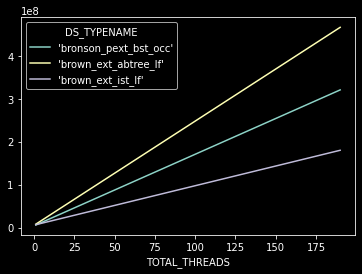

In [5]:
from run_experiment import *
disable_tee_stdout()
disable_logfile_close()
args = do_all('_user_experiment.py --testing --no-compile --no-run --no-createdb --no-plot --no-pages'.split(' '))

#enable_tee_stdout()
#g = get_g()
#plot_set = g['plots'][0]
#where = get_where(plot_set)
#col_vals = dict({ 'INS_DEL_FRAC': '0.5 0.5', 'MAXKEY': '2000000' })

#amended_where = get_amended_where(col_vals, where)
#print('amended_where={}'.format(amended_where))
#process_single_plot(args, plot_set, col_vals, get_where(plot_set))
#header_records, records_full = get_records_plot_full(amended_where)
#pp(header_records)
#headers, records = get_records_plot_from_set(plot_set, amended_where)
#pp(headers)
#pp(records)
headers, records = get_records_plot('DS_TYPENAME', 'TOTAL_THREADS', 'total_throughput', 'WHERE INS_DEL_FRAC == "0.5 0.5" AND MAXKEY == 2000000')
csv = table_to_str(records, headers)
#print(csv)

import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('dark_background')

df = pd.read_csv(io.StringIO(csv), sep=' ')
#df = df.pivot(index='TOTAL_THREADS', columns='DS_TYPENAME', values='total_throughput')
table = pd.pivot_table(df, values='total_throughput', index='TOTAL_THREADS', columns='DS_TYPENAME', aggfunc=np.sum)
#print(table)
table.plot()

